In [32]:
# for reading values if you closed the notebook
filepath = (path_to_powerflow_data + "results/" +
            "approximating_with_rf_grid_results-100000_samples-2019-09-13-07-25.csv")
imported_results = pd.read_csv(filepath)
display(imported_results.sort_values(by=["rank_test_r2"]))

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_r2,split1_test_r2,split2_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse
0,0,66.531391,0.622077,2.545954,0.086762,80,29,"{'n_estimators': 80, 'max_depth': 29}",0.921858,0.922751,0.922099,0.922236,0.000377,1,0.002894,0.002883,0.002889,0.002889,0.000004,10
5,5,59.921115,0.734938,2.203448,0.029155,72,98,"{'n_estimators': 72, 'max_depth': 98}",0.921811,0.921741,0.921164,0.921572,0.000290,2,0.002894,0.002901,0.002907,0.002901,0.000005,9
7,7,52.694661,0.098162,2.040517,0.075283,64,33,"{'n_estimators': 64, 'max_depth': 33}",0.921495,0.921932,0.921088,0.921505,0.000345,3,0.002899,0.002897,0.002909,0.002902,0.000005,8
9,9,42.708556,0.272464,1.667782,0.055191,52,71,"{'n_estimators': 52, 'max_depth': 71}",0.920678,0.921160,0.921027,0.920955,0.000203,4,0.002914,0.002911,0.002911,0.002912,0.000001,7
6,6,49.611883,0.197651,1.920520,0.055440,60,93,"{'n_estimators': 60, 'max_depth': 93}",0.920492,0.921506,0.920086,0.920695,0.000597,5,0.002919,0.002905,0.002928,0.002917,0.000009,6
4,4,32.702112,0.183965,1.336063,0.059603,40,74,"{'n_estimators': 40, 'max_depth': 74}",0.918704,0.919897,0.919109,0.919237,0.000495,6,0.002951,0.002934,0.002942,0.002942,0.000007,5
1,1,20.698034,0.078871,0.903889,0.030214,25,73,"{'n_estimators': 25, 'max_depth': 73}",0.915674,0.917252,0.916619,0.916515,0.000648,7,0.003008,0.002984,0.002990,0.002994,0.000010,4
2,2,19.139486,0.097723,0.843532,0.018133,23,66,"{'n_estimators': 23, 'max_depth': 66}",0.915774,0.915434,0.915281,0.915496,0.000206,8,0.003007,0.003020,0.003011,0.003013,0.000005,3
3,3,8.422979,0.240346,0.468810,0.022842,10,48,"{'n_estimators': 10, 'max_depth': 48}",0.903202,0.904700,0.903273,0.903725,0.000690,9,0.003218,0.003203,0.003221,0.003214,0.000008,2
8,8,6.304425,0.014633,0.322273,0.010596,23,4,"{'n_estimators': 23, 'max_depth': 4}",0.475762,0.463664,0.459374,0.466267,0.006939,10,0.007396,0.007507,0.007516,0.007473,0.000054,1


**Problem**: 

Approximating the non-linear data space that makes up a PyPSA simulation. Specifically, approximating a modified IEEE 13 bus topology with a uniform (grid) input. The approximation is time sensitive.

**Objective**:

This notebook will only look at [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) (RF) models. Per [1], the approximation should have a root mean sqaure error < 0.002 to ensure the approximation is not the largest source of error in the simulation. A standard linear regression will also be calculated for baseline comparison. Since the approximation is time sensitive, a search for the ball park number of samples required for reasonable scores is performed. Once the number of samples to produce reasonable results is found, a grid search can be ran to determine optimal training parameters.

**Hypothesis**: 

Previously, a linear regression model outperformed a non-linear model (artificial neural network) when tested on simple, small radial networks [2]. Since the modified IEEE 13 bus network contains two transformers whos behaviour can become non-linear if their power limit is exceeded (which is allowed in power flow [3]), I suspect there are two possible scenarios:

1. Transformer limit not exceeded: Linear regression outperforms RF model
2. Transformer limit exceeded: RF outperforms linear regressor because a RF model can capture non-linearity 

As for the number of samples required, historically 1e5-1e6 samples produces K-fold cross validation scores with low variance if the feature-label correlation is reasonable.

**Experimental Procedure**:

1. Determine the number of samples required to return reasonable scores with SVR K-fold cross validation. Reasonable scores is defined as:
  * R2 > 0.8
  * RMSE < 0.002
  * K-fold R2 variance one degree of magnitude less than R2
2. Using approximately that number of samples, run grid search to determine optimal parameters/hyperparameters

**Results**:

* 1e5 samples (mean R2: 0.85, std dev: 0.0005)
* 1e4 samples (mean R2: 0.81, std dev: 0.005)
* 1e3 samples (mean R2: 0.71, std dev: 0.027)
* 1e2 samples (mean R2: 0.53, std dev: 0.083)

Removing bad label
* 1e5 samples (mean R2: 0.93, std dev: 0.001)
* 1e4 samples (mean R2: 0.88, std dev: 0.002)
* 1e3 samples (mean R2: 0.79, std dev: 0.02)
* 1e2 samples (mean R2: 0.50, std dev: 0.02)

Running a randomized grid search with 1e5 samples produced the following results:

1. n_estimators: 80, max_depth: 29, mean training time: 66s (mean R2: 0.92 std dev: 0.0004)
2. n_estimators: 72, max_depth: 98, mean training time: 59s (mean R2: 0.92 std dev: 0.0003)
3. .
4. .


9. n_estimators: 10, max_depth: 48, mean training time: 8s (mean R2: 0.90 std dev: 0.0007)
10. n_estimators: 23, max_depth: 4, mean training time: 6s (mean R2: 0.47 std dev: 0.007)

**Discussion**:

One approach to reduce the cost of simulation-based research is to copy the underlying model and evaluate the approximation [1][4].

It takes roughly 7 hours to create 1e5 samples (by running PyPSA sim) on Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz


**Bibliography**

[1] https://github.com/mbardwell/masters

[2] Enhancing Power Flow Simulations Using Function Mapping. Michael Bardwell ; Petr Musilek. 2019 IEEE Canadian Conference on Electrical and Computer Engineering (CCECE)

[3] https://groups.google.com/forum/#!searchin/pypsa/mikey%7Csort:date/pypsa/FqfC_UR85k0/vBc7HYP_EQAJ

[4] ieee-13_timing-pfsim-vs-evaluating-models.ipynb


Table of Contents:
* Source data
* Analyse data
* Setup models
* Determine number of samples to get reasonable scores
* Search

In [33]:
import pypsa
import time
import logging
import numpy as np
import warnings

warnings.filterwarnings('ignore')
logger = logging.getLogger("pypsa")
logger.setLevel("WARNING")
%matplotlib inline

import copy
import csv
import sys
import time

import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import pypsa
from n_dimensional_datasets import *
from plotter import *

from IPython.display import display # for better Pandas printing

In [34]:
def personalise_column_names(df, name):
        new_columns = []
        for column in df.columns:
            new_columns.append(name +  "-" + str(column))
        df.columns = new_columns
        return pd.DataFrame(df)

def collect_data(path_to_powerflow_data, data):
    '''
    Assumes folder tree has
    path_to_powerflow_data/
    -->datafiles
    -->results/
    '''
    data["loads"] = personalise_column_names(pd.read_csv(path_to_powerflow_data + "loads-p_set.csv"), "load")
    data["vmags"] = personalise_column_names(pd.read_csv(path_to_powerflow_data + "results/" + "vmags.csv"), "vmag")
    data["vangs"] = personalise_column_names(pd.read_csv(path_to_powerflow_data + "results/" + "vangs.csv"), "vang")
    data["qmags"] = personalise_column_names(pd.read_csv(path_to_powerflow_data + "results/" + "qmags.csv"), "qmag")
    data["linemags"] = personalise_column_names(pd.read_csv(path_to_powerflow_data + "results/" + "linemags.csv"), "linemag")
    
import pandas as pd
import numpy as np
    
def set_uniform_sample_size(path_to_powerflow_data, data_to_change, n_samples, seed=None):
    '''
    Modifies common .csv files in PyPSA folders with uniformly sampled data 

    Parameters
    ----------
    path_to_powerflow_data: string
        ex: "/home/user/Documents/powerflow_data/"
    data_to_change: list of strings.
        ex: ["loads-p_set", "generators-p_max_pu", "snapshots"] 
    n_samples: int
    
    seed=None: int
    '''

    data = {}
    for datatype in data_to_change:
        data[datatype] = pd.read_csv(path_to_powerflow_data + datatype + ".csv")

    def increase_data(dataframe, n_samples, seed=None):
        addon = {}
        new_df_list = []
        for idx, column in enumerate(dataframe):
          
            if dataframe[column].dtype == np.float64 or dataframe[column].dtype == np.int64:
                ## special cases
                if datatype == "generators-p_max_pu":
                    # add a ridiculous amount of generation so the is always enough power and sim doesn't fail
                    addon[column] = np.random.RandomState(seed=seed).uniform(low=100, high=200, size=n_samples)
                elif datatype == "snapshots":
                    addon[column] = np.ones(n_samples)
                else:
                    addon[column] = np.random.RandomState(seed=seed).uniform(low=0, high=0.5, size=n_samples)
            elif dataframe[column].dtype == object:
                # assuming object is datetime column
                latest_datetime = pd.to_datetime(dataframe[column][0])
                addon[column] = []
                for sample in range(n_samples):
                    addon[column].append(latest_datetime + pd.Timedelta(hours=(1+sample)))
            else:
                raise TypeError("dataframe[column] type: {} should be object or float64/int64".format(
                    type(dataframe[column].dtype)))
        addon_dataframe = pd.DataFrame(addon)
        return dataframe.head(1).append(addon_dataframe)

    for datatype in data:
        data[datatype] = increase_data(data[datatype], n_samples-1, seed) # -1 is for original sample, which stays
        data[datatype].to_csv(path_to_powerflow_data + datatype + ".csv", index=False)
        print("Datatype {} stored".format(datatype))

def create_samples_and_run_network(path_to_powerflow_data, data_to_change, sample_size, seed=None):
    import os
    import shutil
    from pathlib import Path
    import pypsa

    if not os.path.isdir(path_to_powerflow_data):
        src = Path(path_to_powerflow_data).parents[0] / "ieee-13-with-load-gen/" # original modified IEEE model
        shutil.copytree(src, path_to_powerflow_data)

    set_uniform_sample_size(path_to_powerflow_data, data_to_change, sample_size, seed=None)

    network = pypsa.Network(import_name=path_to_powerflow_data)
    network.pf()

    save_path = path_to_powerflow_data + "results/"
    network.buses_t.v_mag_pu.to_csv(save_path + "vmags.csv")
    network.buses_t.v_ang.to_csv(save_path + "vangs.csv")
    network.buses_t.q.to_csv(save_path + "qmags.csv")
    network.lines_t.p0.to_csv(save_path + "linemags.csv")
    
def backup_samples(src, dest):
    '''
    thanks https://www.pythoncentral.io/how-to-recursively-copy-a-directory-folder-in-python/
    '''
    import os
    import errno
    import shutil
    
    try:
        if os.path.isdir(dest):
            shutil.rmtree(dest)
        shutil.copytree(src, dest)
        print("Backup to {} successful".format(dest))
    except OSError as e:
        # If the error was caused because the source wasn't a directory
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)

# Source Data

In [35]:
## USER INPUT
sample_size = 100000 # this is the max number of samples available

data_to_change = ["loads-p_set", "snapshots", "loads-q_set"]

path_to_powerflow_example = "../../pypsa/examples/ieee-13/"
path_to_powerflow_data = (path_to_powerflow_example +
                          "/ieee-13-with-load-gen-uniform-data-"
                          + str(sample_size) +
                          "-samples/")
path_to_powerflow_results = path_to_powerflow_data + "results/"

In [36]:
## Uncomment to generate load samples for modified IEEE-13 network
# if sample_size > 10000:
#     user = input("Are you sure [y/n]? This could erase hours worth of data")
#     if user == "y":
#         backup_samples(path_to_powerflow_results, path_to_powerflow_data + "results-backup/")
#         create_samples_and_run_network(path_to_powerflow_data, data_to_change, sample_size, seed=None)
# else:
#     create_samples_and_run_network(path_to_powerflow_data, data_to_change, sample_size, seed=None)

data = {"loads": [], "vmags": [], "vangs": [], "qmags": [], "linemags": []}
collect_data(path_to_powerflow_data, data)

# Analyse Data

In [37]:
features = data["loads"].drop("load-name", axis=1)
labels = data["vmags"].drop(["vmag-name", "vmag-Substation"], axis=1) #loc[:,["vmag-632", "vmag-671", "vmag-675"]]
features_and_labels = features.join(labels)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f071820bb90>,
      dtype=object)

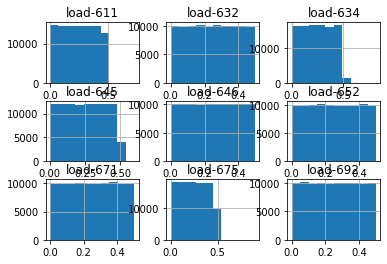

In [38]:
features.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06e68c9a10>,
      dtype=object)

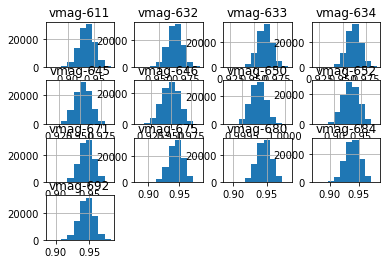

In [39]:
labels.hist()

In [40]:
corr_matrix = labels.join(features).corr()

# only loads for columns
cols = [c for i, c in enumerate(corr_matrix.columns) if corr_matrix.keys().str.contains("^load", regex=True)[i]]
reduced_corr_matrix = corr_matrix[cols]
reduced_corr_matrix["row average"] = pd.Series(reduced_corr_matrix.mean(axis=1))
# only voltages for rows
rows = reduced_corr_matrix.index[reduced_corr_matrix.index.str.contains("load")]
reduced_corr_matrix.drop(rows, inplace=True)
reduced_corr_matrix = reduced_corr_matrix.append(pd.Series(reduced_corr_matrix.mean(), name="column average"))

display(reduced_corr_matrix)

,load-632,load-634,load-645,load-646,load-652,load-671,load-675,load-692,load-611,row average
vmag-650,-0.008439,0.001458,-0.002953,-0.000081,-0.001955,-0.007134,-0.001353,-0.004306,-0.001971,-0.002970
vmag-646,-0.196512,-0.200144,-0.487273,-0.671172,-0.211606,-0.204674,-0.199273,-0.208235,-0.211118,-0.287779
vmag-645,-0.219407,-0.223990,-0.546822,-0.558979,-0.235927,-0.229190,-0.223332,-0.233060,-0.236599,-0.300812
vmag-632,-0.316812,-0.320804,-0.319882,-0.333944,-0.339195,-0.329811,-0.324215,-0.334387,-0.339914,-0.328774
vmag-633,-0.286406,-0.512513,-0.289868,-0.302645,-0.307178,-0.298881,-0.292050,-0.303695,-0.307554,-0.322310
vmag-634,-0.286326,-0.512387,-0.289801,-0.302548,-0.307111,-0.298800,-0.291940,-0.303616,-0.307463,-0.322221
vmag-611,-0.157880,-0.158084,-0.155850,-0.168281,-0.463138,-0.316864,-0.313902,-0.320260,-0.600170,-0.294936
vmag-684,-0.170285,-0.171447,-0.168631,-0.182151,-0.502244,-0.343257,-0.340429,-0.346904,-0.501052,-0.302933
vmag-671,-0.196724,-0.199334,-0.196651,-0.210183,-0.410146,-0.399117,-0.395772,-0.403272,-0.410221,-0.313491
vmag-692,-0.196689,-0.199299,-0.196616,-0.210148,-0.410075,-0.399049,-0.395916,-0.403413,-0.410151,-0.313484


# Setup Models

In [41]:
import csv
import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from scoring import rmse

In [42]:
def set_data_size(n_samples, n_training_samples):
    X_train, X_val, y_train, y_val, test_idx, train_idx = train_test_split(features,
                                                                           labels,
                                                                           range(features.shape[0]),
                                                                           train_size=n_training_samples,
                                                                           test_size=n_samples-n_training_samples,
                                                                           random_state=None)
    X_train = X_train.values
    y_train = y_train.values
    X_val = X_val.values
    y_val = y_val.values

    return X_train, y_train, X_val, y_val

# Determine number of samples to get reasonable scores

In [43]:
# setup model parameters/hyperparameters

'''
dnn hyperparameters are chosen from sandbox testing. On average the model attempts to converge 
(with other parameters it sometimes gives up early).
'''
rf = RandomForestRegressor(n_estimators=100, max_depth=None)

linear = LinearRegression()

In [56]:
foo = pd.DataFrame({"A":[1,2,3], "B":[1,2,3], "C":[1,2,3]})
foo.loc[:,["A", "B"]].mean()

A    2.0
B    2.0
dtype: float64

In [57]:
# cell works, may just be commented out because it is an expensive process and user can just skip to grid search
rf_xval_scores = []
linear_xval_scores = []
for i, n_samples in enumerate([100, 1000, 10000, 100000]):
    current_iteration = i

    n_training_samples = int(n_samples*(80/100))
    X_train, y_train, X_val, y_val = set_data_size(n_samples, n_training_samples)

    print("\n\nRun: ", current_iteration)
    print("n_training_samples: ", n_training_samples)
    print("n_validation_samples: ", n_samples-n_training_samples)
    print("n_features: ", X_train.shape[1])
    print("n_labels: ", y_train.shape[1])

    ## rf
    print("\n\nRF\n\n")
    time_start = time.time()
    rf_xval_scores.append(cross_validate(rf, 
                                         X_train, 
                                         y_train, 
                                         cv=5, 
                                         n_jobs=-1, 
                                         scoring={"r2": make_scorer(r2_score), 
                                                  "rmse": make_scorer(rmse),
                                                  "mae": make_scorer(mae)}))
    time_rf = time.time()
    print("cross validation training time {:.5}".format(time_rf-time_start))
    print("cross validation training scores: ")
    rf_results = pd.DataFrame(rf_xval_scores[current_iteration])
    rf_results.columns = ["rf_"+col for col in rf_results.columns]
    display(rf_results)
    print("\nmeans: {}\n".format(rf_results.mean()))
    print("\nstds: {}\n".format(rf_results.std()))

    rf.fit(X_train, y_train)
    print("non-cross validation model scores for reference:")
    print("training score: ", r2_score(y_train, rf.predict(X_train)))
    print("validation score: ", r2_score(y_val, rf.predict(X_val)))
    print("rmse: ", rmse(rf.predict(X_val), y_val))



    ## linear regression
    print("\n\nLINEAR REGRESSION\n\n")
    time_start = time.time()
    linear_xval_scores.append(cross_validate(linear,
                                             X_train,
                                             y_train,
                                             cv=5,
                                             n_jobs=-1,
                                             scoring={"r2": make_scorer(r2_score), 
                                                      "rmse": make_scorer(rmse),
                                                      "mae": make_scorer(mae)}))

    time_linear = time.time()
    print("cross validation training time {:.5}".format(time_linear-time_start))
    print("cross validation training scores: ")
    linear_results = pd.DataFrame(linear_xval_scores[current_iteration])
    linear_results.columns = ["linear_"+col for col in linear_results.columns]
    display(linear_results)
    print("means: ", linear_results.mean())
    print("stds: ", linear_results.std())

    linear.fit(X_train, y_train)
    print("non-cross validation model scores for reference:")
    print("training score: ", r2_score(y_train, linear.predict(X_train)))
    print("validation score: ", r2_score(y_val, linear.predict(X_val)))
    print("rmse: ", rmse(linear.predict(X_val), y_val))

    ## model statistics
    datetimestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
    results_to_save = rf_results.join(linear_results).round(3)
    results_to_save.to_csv(path_to_powerflow_data + 
                           "/results/approximating_with_rf_results-{}_samples-{}.csv".format(n_samples, 
                                                                                             datetimestamp))



Run:  0
n_training_samples:  80
n_validation_samples:  20
n_features:  9
n_labels:  13


RF


cross validation training time 0.57645
cross validation training scores: 


,rf_fit_time,rf_score_time,rf_test_r2,rf_test_rmse,rf_test_mae
0,0.234946,0.032102,0.275278,0.007444,0.005623
1,0.231609,0.053604,0.343407,0.007440,0.005836
2,0.245690,0.040077,0.370510,0.008191,0.006360
3,0.219648,0.058665,0.575655,0.007260,0.005382
4,0.189950,0.017686,0.392093,0.006909,0.005565


means:  rf_fit_time      0.224369
rf_score_time    0.040427
rf_test_r2       0.391389
rf_test_rmse     0.007449
rf_test_mae      0.005753
dtype: float64
stds:  rf_fit_time      0.021365
rf_score_time    0.016529
rf_test_r2       0.111998
rf_test_rmse     0.000468
rf_test_mae      0.000376
dtype: float64
non-cross validation model scores for reference:
training score:  0.9346491578690946
validation score:  0.4878262581996082
rmse:  0.005841416070168793


LINEAR REGRESSION


cross validation training time 0.018223
cross validation training scores: 


,linear_fit_time,linear_score_time,linear_test_r2,linear_test_rmse,linear_test_mae
0,0.001162,0.000876,0.876411,0.001831,0.001452
1,0.003350,0.000861,0.870274,0.001694,0.001328
2,0.001110,0.000934,0.872074,0.001512,0.001238
3,0.001088,0.000853,0.890395,0.002007,0.001594
4,0.001056,0.000892,0.743305,0.002331,0.001856


means:  linear_fit_time      0.001553
linear_score_time    0.000883
linear_test_r2       0.850492
linear_test_rmse     0.001875
linear_test_mae      0.001493
dtype: float64
stds:  linear_fit_time      0.001005
linear_score_time    0.000032
linear_test_r2       0.060436
linear_test_rmse     0.000313
linear_test_mae      0.000243
dtype: float64
non-cross validation model scores for reference:
training score:  0.9040067826078703
validation score:  0.8954608230273239
rmse:  0.0014455363927927784


Run:  1
n_training_samples:  800
n_validation_samples:  200
n_features:  9
n_labels:  13


RF


cross validation training time 2.0379
cross validation training scores: 


,rf_fit_time,rf_score_time,rf_test_r2,rf_test_rmse,rf_test_mae
0,1.332630,0.055166,0.703785,0.004890,0.003723
1,1.231431,0.052339,0.677419,0.005127,0.004031
2,1.036967,0.064205,0.718905,0.004822,0.003674
3,1.108692,0.050938,0.726417,0.004212,0.003171
4,0.828268,0.047439,0.708276,0.004615,0.003582


means:  rf_fit_time      1.107598
rf_score_time    0.054017
rf_test_r2       0.706960
rf_test_rmse     0.004733
rf_test_mae      0.003636
dtype: float64
stds:  rf_fit_time      0.192996
rf_score_time    0.006338
rf_test_r2       0.018747
rf_test_rmse     0.000344
rf_test_mae      0.000310
dtype: float64
non-cross validation model scores for reference:
training score:  0.96071241787492
validation score:  0.7138890037629408
rmse:  0.00450795826099678


LINEAR REGRESSION


cross validation training time 0.062001
cross validation training scores: 


,linear_fit_time,linear_score_time,linear_test_r2,linear_test_rmse,linear_test_mae
0,0.001422,0.001492,0.902979,0.001442,0.001107
1,0.001456,0.001492,0.903490,0.001386,0.001063
2,0.001468,0.001466,0.902779,0.001446,0.001079
3,0.001323,0.001524,0.901276,0.001388,0.001051
4,0.001198,0.001264,0.904507,0.001355,0.001029


means:  linear_fit_time      0.001373
linear_score_time    0.001448
linear_test_r2       0.903006
linear_test_rmse     0.001403
linear_test_mae      0.001066
dtype: float64
stds:  linear_fit_time      0.000113
linear_score_time    0.000105
linear_test_r2       0.001176
linear_test_rmse     0.000039
linear_test_mae      0.000029
dtype: float64
non-cross validation model scores for reference:
training score:  0.9067180104225171
validation score:  0.9022391044104356
rmse:  0.0013996049121788017


Run:  2
n_training_samples:  8000
n_validation_samples:  2000
n_features:  9
n_labels:  13


RF


cross validation training time 26.025
cross validation training scores: 


,rf_fit_time,rf_score_time,rf_test_r2,rf_test_rmse,rf_test_mae
0,14.435108,0.513047,0.804792,0.003515,0.002673
1,14.528598,0.506770,0.802270,0.003595,0.002720
2,15.437716,0.253717,0.808759,0.003370,0.002568
3,15.517095,0.363902,0.801697,0.003629,0.002697
4,10.687127,0.307260,0.810619,0.003353,0.002562


means:  rf_fit_time      14.121129
rf_score_time     0.388939
rf_test_r2        0.805627
rf_test_rmse      0.003492
rf_test_mae       0.002644
dtype: float64
stds:  rf_fit_time      1.983627
rf_score_time    0.117122
rf_test_r2       0.003942
rf_test_rmse     0.000127
rf_test_mae      0.000074
dtype: float64
non-cross validation model scores for reference:
training score:  0.9727253873893429
validation score:  0.8160829236195214
rmse:  0.00333201590221204


LINEAR REGRESSION


cross validation training time 0.14261
cross validation training scores: 


,linear_fit_time,linear_score_time,linear_test_r2,linear_test_rmse,linear_test_mae
0,0.004771,0.016948,0.905958,0.001399,0.001064
1,0.005487,0.009716,0.906449,0.001387,0.001049
2,0.005151,0.005256,0.905440,0.001373,0.001038
3,0.004977,0.005320,0.905396,0.001446,0.001107
4,0.005847,0.006967,0.905451,0.001388,0.001061


means:  linear_fit_time      0.005246
linear_score_time    0.008841
linear_test_r2       0.905739
linear_test_rmse     0.001399
linear_test_mae      0.001064
dtype: float64
stds:  linear_fit_time      0.000426
linear_score_time    0.004880
linear_test_r2       0.000459
linear_test_rmse     0.000028
linear_test_mae      0.000026
dtype: float64
non-cross validation model scores for reference:
training score:  0.9059339708009607
validation score:  0.9057730364458928
rmse:  0.001392817296203315


Run:  3
n_training_samples:  80000
n_validation_samples:  20000
n_features:  9
n_labels:  13


RF


cross validation training time 376.52
cross validation training scores: 


,rf_fit_time,rf_score_time,rf_test_r2,rf_test_rmse,rf_test_mae
0,237.069553,6.342979,0.853137,0.002706,0.002056
1,233.765389,7.444243,0.851084,0.002730,0.002073
2,230.483687,6.998802,0.852106,0.002731,0.002063
3,235.826988,7.219132,0.851014,0.002750,0.002086
4,134.157962,4.559935,0.851812,0.002696,0.002040


means:  rf_fit_time      214.260716
rf_score_time      6.513018
rf_test_r2         0.851831
rf_test_rmse       0.002722
rf_test_mae        0.002064
dtype: float64
stds:  rf_fit_time      44.848120
rf_score_time     1.166749
rf_test_r2        0.000867
rf_test_rmse      0.000022
rf_test_mae       0.000017
dtype: float64
non-cross validation model scores for reference:
training score:  0.9788990348801156
validation score:  0.8553016610895381
rmse:  0.0026443803437235514


LINEAR REGRESSION


cross validation training time 3.4765
cross validation training scores: 


,linear_fit_time,linear_score_time,linear_test_r2,linear_test_rmse,linear_test_mae
0,0.212236,0.264154,0.906036,0.001392,0.001059
1,0.141616,0.261608,0.905968,0.001387,0.001054
2,0.403416,0.250062,0.905764,0.001402,0.001070
3,0.374513,0.193575,0.905531,0.001410,0.001073
4,0.300932,0.244922,0.905428,0.001404,0.001067


means:  linear_fit_time      0.286543
linear_score_time    0.242864
linear_test_r2       0.905745
linear_test_rmse     0.001399
linear_test_mae      0.001065
dtype: float64
stds:  linear_fit_time      0.109693
linear_score_time    0.028679
linear_test_r2       0.000265
linear_test_rmse     0.000009
linear_test_mae      0.000008
dtype: float64
non-cross validation model scores for reference:
training score:  0.9057855442683762
validation score:  0.9057988920846834
rmse:  0.0013927365023352575


# Remove bad label and repeat

In [30]:
# setup model parameters/hyperparameters

'''
dnn hyperparameters are chosen from sandbox testing. On average the model attempts to converge 
(with other parameters it sometimes gives up early).
'''
rf = RandomForestRegressor(n_estimators=100, max_depth=None)

linear = LinearRegression()

In [58]:
# cell works, may just be commented out because it is an expensive process and user can just skip to grid search
rf_xval_scores = []
linear_xval_scores = []
for i, n_samples in enumerate([100, 1000, 10000, 100000]):
    current_iteration = i

    n_training_samples = int(n_samples*(80/100))
    X_train, y_train, X_val, y_val = set_data_size(n_samples, n_training_samples)
    # remove bad label
    y_train = y_train.T[1:].T
    y_val = y_val.T[1:].T

    print("\n\nRun: ", current_iteration)
    print("n_training_samples: ", n_training_samples)
    print("n_validation_samples: ", n_samples-n_training_samples)
    print("n_features: ", X_train.shape[1])
    print("n_labels: ", y_train.shape[1])

    ## rf
    print("\n\nRF\n\n")
    time_start = time.time()
    rf_xval_scores.append(cross_validate(rf, 
                                         X_train, 
                                         y_train, 
                                         cv=5, 
                                         n_jobs=-1, 
                                         scoring={"r2": make_scorer(r2_score), 
                                                  "rmse": make_scorer(rmse),
                                                  "mae": make_scorer(mae)}))
    time_rf = time.time()
    print("cross validation training time {:.5}".format(time_rf-time_start))
    print("cross validation training scores: ")
    rf_results = pd.DataFrame(rf_xval_scores[current_iteration])
    rf_results.columns = ["rf_"+col for col in rf_results.columns]
    display(rf_results)
    print("\nmeans: {}\n".format(rf_results.mean()))
    print("\nstds: {}\n".format(rf_results.std()))

    rf.fit(X_train, y_train)
    print("non-cross validation model scores for reference:")
    print("training score: ", r2_score(y_train, rf.predict(X_train)))
    print("validation score: ", r2_score(y_val, rf.predict(X_val)))
    print("rmse: ", rmse(rf.predict(X_val), y_val))



    ## linear regression
    print("\n\nLINEAR REGRESSION\n\n")
    time_start = time.time()
    linear_xval_scores.append(cross_validate(linear,
                                             X_train,
                                             y_train,
                                             cv=5,
                                             n_jobs=-1,
                                             scoring={"r2": make_scorer(r2_score), 
                                                      "rmse": make_scorer(rmse),
                                                      "mae": make_scorer(mae)}))

    time_linear = time.time()
    print("cross validation training time {:.5}".format(time_linear-time_start))
    print("cross validation training scores: ")
    linear_results = pd.DataFrame(linear_xval_scores[current_iteration])
    linear_results.columns = ["linear_"+col for col in linear_results.columns]
    display(linear_results)
    print("means: ", linear_results.mean())
    print("stds: ", linear_results.std())

    linear.fit(X_train, y_train)
    print("non-cross validation model scores for reference:")
    print("training score: ", r2_score(y_train, linear.predict(X_train)))
    print("validation score: ", r2_score(y_val, linear.predict(X_val)))
    print("rmse: ", rmse(linear.predict(X_val), y_val))

    ## model statistics
    datetimestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
    results_to_save = rf_results.join(linear_results).round(3)
    results_to_save.to_csv(path_to_powerflow_data + 
                           "/results/approximating_with_rf_results-{}_samples-{}-without_badlabel.csv".format(n_samples, 
                                                                                                              datetimestamp))



Run:  0
n_training_samples:  80
n_validation_samples:  20
n_features:  9
n_labels:  12


RF


cross validation training time 0.4819
cross validation training scores: 


,rf_fit_time,rf_score_time,rf_test_r2,rf_test_rmse,rf_test_mae
0,0.287576,0.075214,0.412189,0.007678,0.006227
1,0.213524,0.057418,0.406531,0.006876,0.005553
2,0.201118,0.066734,0.476008,0.009115,0.007241
3,0.189464,0.029889,0.465925,0.009322,0.007539
4,0.158770,0.015944,0.448869,0.007049,0.006105



means: rf_fit_time      0.210090
rf_score_time    0.049040
rf_test_r2       0.441904
rf_test_rmse     0.008008
rf_test_mae      0.006533
dtype: float64


stds: rf_fit_time      0.047842
rf_score_time    0.025152
rf_test_r2       0.031316
rf_test_rmse     0.001147
rf_test_mae      0.000829
dtype: float64

non-cross validation model scores for reference:
training score:  0.9371937796196
validation score:  0.4826365410995284
rmse:  0.007673420032898057


LINEAR REGRESSION


cross validation training time 0.018553
cross validation training scores: 


,linear_fit_time,linear_score_time,linear_test_r2,linear_test_rmse,linear_test_mae
0,0.000974,0.000897,0.981914,0.001349,0.001109
1,0.000933,0.000840,0.972400,0.001481,0.001269
2,0.000913,0.000945,0.988237,0.001424,0.001102
3,0.000623,0.000841,0.981804,0.001630,0.001228
4,0.000608,0.000802,0.976639,0.001412,0.001058


means:  linear_fit_time      0.000810
linear_score_time    0.000865
linear_test_r2       0.980199
linear_test_rmse     0.001459
linear_test_mae      0.001153
dtype: float64
stds:  linear_fit_time      0.000179
linear_score_time    0.000056
linear_test_r2       0.005992
linear_test_rmse     0.000106
linear_test_mae      0.000090
dtype: float64
non-cross validation model scores for reference:
training score:  0.9870208843849149
validation score:  0.9798529160549448
rmse:  0.0015609445196745227


Run:  1
n_training_samples:  800
n_validation_samples:  200
n_features:  9
n_labels:  12


RF


cross validation training time 2.0768
cross validation training scores: 


,rf_fit_time,rf_score_time,rf_test_r2,rf_test_rmse,rf_test_mae
0,1.113461,0.079238,0.758991,0.004841,0.003799
1,1.098672,0.067334,0.783074,0.005135,0.004128
2,1.128208,0.070110,0.775676,0.004681,0.003713
3,1.108560,0.082779,0.776488,0.005399,0.004291
4,0.728965,0.069999,0.810437,0.004278,0.003337



means: rf_fit_time      1.035573
rf_score_time    0.073892
rf_test_r2       0.780933
rf_test_rmse     0.004867
rf_test_mae      0.003854
dtype: float64


stds: rf_fit_time      0.171730
rf_score_time    0.006709
rf_test_r2       0.018735
rf_test_rmse     0.000429
rf_test_mae      0.000373
dtype: float64

non-cross validation model scores for reference:
training score:  0.9710708860520557
validation score:  0.7651727080188176
rmse:  0.005118209948956922


LINEAR REGRESSION


cross validation training time 0.11212
cross validation training scores: 


,linear_fit_time,linear_score_time,linear_test_r2,linear_test_rmse,linear_test_mae
0,0.001688,0.001534,0.981052,0.001379,0.001123
1,0.001398,0.001464,0.982602,0.001481,0.001170
2,0.001873,0.002034,0.976830,0.001547,0.001230
3,0.001759,0.002104,0.980465,0.001623,0.001277
4,0.001203,0.001412,0.981581,0.001383,0.001105


means:  linear_fit_time      0.001584
linear_score_time    0.001710
linear_test_r2       0.980506
linear_test_rmse     0.001483
linear_test_mae      0.001181
dtype: float64
stds:  linear_fit_time      0.000276
linear_score_time    0.000332
linear_test_r2       0.002200
linear_test_rmse     0.000106
linear_test_mae      0.000073
dtype: float64
non-cross validation model scores for reference:
training score:  0.9812332182945714
validation score:  0.9817057776691991
rmse:  0.001462868420461722


Run:  2
n_training_samples:  8000
n_validation_samples:  2000
n_features:  9
n_labels:  12


RF


cross validation training time 23.661
cross validation training scores: 


,rf_fit_time,rf_score_time,rf_test_r2,rf_test_rmse,rf_test_mae
0,14.246301,0.481744,0.874347,0.003661,0.002871
1,14.478292,0.485232,0.873345,0.003632,0.002848
2,14.251193,0.484320,0.875907,0.003548,0.002804
3,14.311735,0.492909,0.871495,0.003629,0.002886
4,8.611859,0.225512,0.874971,0.003634,0.002861



means: rf_fit_time      13.179876
rf_score_time     0.433943
rf_test_r2        0.874013
rf_test_rmse      0.003621
rf_test_mae       0.002854
dtype: float64


stds: rf_fit_time      2.555325
rf_score_time    0.116591
rf_test_r2       0.001688
rf_test_rmse     0.000043
rf_test_mae      0.000031
dtype: float64

non-cross validation model scores for reference:
training score:  0.9827020218150118
validation score:  0.8785365322208745
rmse:  0.003520414025608774


LINEAR REGRESSION


cross validation training time 0.15377
cross validation training scores: 


,linear_fit_time,linear_score_time,linear_test_r2,linear_test_rmse,linear_test_mae
0,0.027058,0.005002,0.981936,0.001441,0.001142
1,0.004701,0.017853,0.981102,0.001447,0.001135
2,0.012523,0.004897,0.980830,0.001441,0.001133
3,0.021326,0.005063,0.981629,0.001424,0.001111
4,0.007970,0.018317,0.980811,0.001474,0.001169


means:  linear_fit_time      0.014716
linear_score_time    0.010226
linear_test_r2       0.981262
linear_test_rmse     0.001445
linear_test_mae      0.001138
dtype: float64
stds:  linear_fit_time      0.009309
linear_score_time    0.007176
linear_test_r2       0.000501
linear_test_rmse     0.000018
linear_test_mae      0.000021
dtype: float64
non-cross validation model scores for reference:
training score:  0.9813433727686417
validation score:  0.981642046905379
rmse:  0.0014155667802043148


Run:  3
n_training_samples:  80000
n_validation_samples:  20000
n_features:  9
n_labels:  12


RF


cross validation training time 349.12
cross validation training scores: 


,rf_fit_time,rf_score_time,rf_test_r2,rf_test_rmse,rf_test_mae
0,212.620691,6.995426,0.927114,0.002808,0.002210
1,212.337193,7.285441,0.927148,0.002841,0.002238
2,212.390286,7.127367,0.925955,0.002819,0.002218
3,211.269871,6.938853,0.924189,0.002854,0.002238
4,126.890430,3.751036,0.926098,0.002813,0.002214



means: rf_fit_time      195.101694
rf_score_time      6.419625
rf_test_r2         0.926101
rf_test_rmse       0.002827
rf_test_mae        0.002224
dtype: float64


stds: rf_fit_time      38.134825
rf_score_time     1.497752
rf_test_r2        0.001204
rf_test_rmse      0.000020
rf_test_mae       0.000013
dtype: float64

non-cross validation model scores for reference:
training score:  0.9898353391231685
validation score:  0.929330591662584
rmse:  0.0027494025926258145


LINEAR REGRESSION


cross validation training time 2.6046
cross validation training scores: 


,linear_fit_time,linear_score_time,linear_test_r2,linear_test_rmse,linear_test_mae
0,0.193712,0.304235,0.981758,0.001438,0.001135
1,0.377328,0.219802,0.981677,0.001459,0.001150
2,0.183288,0.287011,0.981077,0.001456,0.001147
3,0.346564,0.205200,0.981193,0.001453,0.001142
4,0.241758,0.160895,0.980821,0.001466,0.001152


means:  linear_fit_time      0.268530
linear_score_time    0.235429
linear_test_r2       0.981305
linear_test_rmse     0.001454
linear_test_mae      0.001145
dtype: float64
stds:  linear_fit_time      0.088751
linear_score_time    0.059389
linear_test_r2       0.000401
linear_test_rmse     0.000011
linear_test_mae      0.000007
dtype: float64
non-cross validation model scores for reference:
training score:  0.9813147380275443
validation score:  0.981067481945418
rmse:  0.001454991424818702


# Search

In [59]:
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 600)

In [60]:
n_samples = 100000
if n_samples < 100000:
    raise ValueError("So you don't accidentally run this on 100 samples again")
n_training_samples = int(n_samples*(80/100))
X_train, y_train, X_val, y_val = set_data_size(n_samples, n_training_samples)
# remove bad label
y_train = y_train.T[1:].T
y_val = y_val.T[1:].T

In [61]:
rf = RandomForestRegressor()
params = {"n_estimators": range(100), 
          "max_depth": [None]+[i for i in range(1, 100)]}
grid = RandomizedSearchCV(rf, params, cv=3, n_iter=10, n_jobs=-1, refit=False,
                          scoring={"r2": make_scorer(r2_score), "rmse": make_scorer(rmse), "mae": make_scorer(mae)}, 
                          iid=False, verbose=10)

grid.fit(X_train, y_train)

print("\n\nRF\n\n")
grid_results = pd.DataFrame(grid.cv_results_)
display(grid_results.sort_values(by=["rank_test_r2"]))
datetimestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
filepath = (path_to_powerflow_data + 
            "/results/approximating_with_rf_grid_results-{}_samples-{}-without_badlabel.csv".format(n_samples, datetimestamp))
print("Saving to ", filepath)
grid_results.to_csv(filepath)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  7.8min remaining:   52.2s




RF




[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.0min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_r2,split1_test_r2,split2_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae
9,132.365241,6.918603,7.170864,1.009576,90,85,"{'n_estimators': 90, 'max_depth': 85}",0.922127,0.923607,0.922883,0.922872,0.000604,1,0.002895,0.002870,0.002895,0.002887,0.000012,10,0.002283,0.002262,0.002283,0.002276,0.000010,10
1,117.176452,0.143672,7.281535,0.264082,69,51,"{'n_estimators': 69, 'max_depth': 51}",0.920476,0.922817,0.922761,0.922018,0.001090,2,0.002925,0.002887,0.002897,0.002903,0.000016,9,0.002308,0.002273,0.002285,0.002289,0.000014,9
8,92.920707,0.497797,5.691919,0.091007,55,50,"{'n_estimators': 55, 'max_depth': 50}",0.920355,0.922067,0.921570,0.921331,0.000719,3,0.002929,0.002900,0.002920,0.002916,0.000012,8,0.002312,0.002285,0.002304,0.002300,0.000011,8
5,92.682659,1.112300,5.109693,0.071786,59,15,"{'n_estimators': 59, 'max_depth': 15}",0.917398,0.919695,0.919643,0.918912,0.001071,4,0.002978,0.002941,0.002950,0.002956,0.000016,7,0.002353,0.002317,0.002331,0.002334,0.000015,7
6,42.599245,1.018763,2.788654,0.120795,25,76,"{'n_estimators': 25, 'max_depth': 76}",0.915148,0.917588,0.917577,0.916771,0.001147,5,0.003020,0.002984,0.002991,0.002998,0.000016,6,0.002385,0.002349,0.002356,0.002363,0.000015,6
0,42.385478,0.268857,2.969224,0.091993,25,79,"{'n_estimators': 25, 'max_depth': 79}",0.914955,0.918281,0.916361,0.916532,0.001363,6,0.003027,0.002969,0.003016,0.003004,0.000025,5,0.002387,0.002341,0.002381,0.002370,0.000020,5
3,34.089848,0.143068,2.407456,0.119663,20,95,"{'n_estimators': 20, 'max_depth': 95}",0.914835,0.915598,0.915291,0.915241,0.000313,7,0.003025,0.003021,0.003033,0.003026,0.000005,4,0.002386,0.002382,0.002394,0.002388,0.000005,4
7,17.102771,0.128637,1.355702,0.051633,10,97,"{'n_estimators': 10, 'max_depth': 97}",0.903616,0.904904,0.904003,0.904174,0.000540,8,0.003224,0.003203,0.003231,0.003219,0.000012,3,0.002539,0.002526,0.002553,0.002539,0.000011,3
4,31.756110,0.407498,1.327375,0.056869,25,11,"{'n_estimators': 25, 'max_depth': 11}",0.869243,0.873279,0.871682,0.871401,0.001659,9,0.003734,0.003686,0.003720,0.003714,0.000020,2,0.002959,0.002921,0.002950,0.002944,0.000016,2
2,90.067484,0.677483,2.493779,0.012193,80,9,"{'n_estimators': 80, 'max_depth': 9}",0.808030,0.812812,0.811274,0.810705,0.001993,10,0.004521,0.004468,0.004500,0.004497,0.000022,1,0.003588,0.003549,0.003576,0.003571,0.000016,1


Saving to  ../../pypsa/examples/ieee-13//ieee-13-with-load-gen-uniform-data-100000-samples//results/approximating_with_rf_grid_results-100000_samples-2019-09-14-04-11-without_badlabel.csv


In [22]:
# for reading values if you closed the notebook
filepath = (path_to_powerflow_data + "results/" +
            "approximating_with_rf_grid_results-100000_samples-2019-09-13-07-25.csv")
imported_results = pd.read_csv(filepath)
display(imported_results.sort_values(by=["rank_test_r2"]))

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_r2,split1_test_r2,split2_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse
0,0,66.531391,0.622077,2.545954,0.086762,80,29,"{'n_estimators': 80, 'max_depth': 29}",0.921858,0.922751,0.922099,0.922236,0.000377,1,0.002894,0.002883,0.002889,0.002889,0.000004,10
5,5,59.921115,0.734938,2.203448,0.029155,72,98,"{'n_estimators': 72, 'max_depth': 98}",0.921811,0.921741,0.921164,0.921572,0.000290,2,0.002894,0.002901,0.002907,0.002901,0.000005,9
7,7,52.694661,0.098162,2.040517,0.075283,64,33,"{'n_estimators': 64, 'max_depth': 33}",0.921495,0.921932,0.921088,0.921505,0.000345,3,0.002899,0.002897,0.002909,0.002902,0.000005,8
9,9,42.708556,0.272464,1.667782,0.055191,52,71,"{'n_estimators': 52, 'max_depth': 71}",0.920678,0.921160,0.921027,0.920955,0.000203,4,0.002914,0.002911,0.002911,0.002912,0.000001,7
6,6,49.611883,0.197651,1.920520,0.055440,60,93,"{'n_estimators': 60, 'max_depth': 93}",0.920492,0.921506,0.920086,0.920695,0.000597,5,0.002919,0.002905,0.002928,0.002917,0.000009,6
4,4,32.702112,0.183965,1.336063,0.059603,40,74,"{'n_estimators': 40, 'max_depth': 74}",0.918704,0.919897,0.919109,0.919237,0.000495,6,0.002951,0.002934,0.002942,0.002942,0.000007,5
1,1,20.698034,0.078871,0.903889,0.030214,25,73,"{'n_estimators': 25, 'max_depth': 73}",0.915674,0.917252,0.916619,0.916515,0.000648,7,0.003008,0.002984,0.002990,0.002994,0.000010,4
2,2,19.139486,0.097723,0.843532,0.018133,23,66,"{'n_estimators': 23, 'max_depth': 66}",0.915774,0.915434,0.915281,0.915496,0.000206,8,0.003007,0.003020,0.003011,0.003013,0.000005,3
3,3,8.422979,0.240346,0.468810,0.022842,10,48,"{'n_estimators': 10, 'max_depth': 48}",0.903202,0.904700,0.903273,0.903725,0.000690,9,0.003218,0.003203,0.003221,0.003214,0.000008,2
8,8,6.304425,0.014633,0.322273,0.010596,23,4,"{'n_estimators': 23, 'max_depth': 4}",0.475762,0.463664,0.459374,0.466267,0.006939,10,0.007396,0.007507,0.007516,0.007473,0.000054,1
